In [1]:
import pandas as pd
import numpy as np

# !!--- load data files ---!!
train_data = pd.read_csv('train.csv', encoding = "ISO-8859-1")                                 #(250306, 34)
test_data = pd.read_csv('test.csv', encoding = "ISO-8859-1")   #X_test                         #(61001, 27)
#address & latlons are not relevant here



# !!--- Prepare X_train, y_train, X_test ---!!
X_train = train_data.dropna(subset=['compliance'])   #dropna in compliance column              #(159880, 34)
y_train = X_train['compliance'].astype(int)   #compliance column converted to int without na   #(159880,)
X_test = test_data                                                                             #(61001, 27)
#y_prob is need to be predicted (objective)   #y_proba_cls = cls.fit(X_train, y_train).predict_proba(X_test)



# !!--- Convert missing values Nan to 0 for int and "NA" for string in X_train & X_test ---!!
# !-- X_train --!
X_train_converted_na = X_train.copy()

convert_nan_to_NA_X_train = [
    'violator_name',
    'violation_zip_code',
    'mailing_address_str_name',
    'state',
    'zip_code',
    'non_us_str_code',
    'hearing_date',
    'grafitti_status',
    'payment_date',
    'collection_status',
    'mailing_address_str_number'
]

X_train_converted_na[convert_nan_to_NA_X_train] = X_train[convert_nan_to_NA_X_train].fillna('NA')

# !-- X_test --!
X_test_converted_na = X_test.copy()

convert_nan_to_NA_X_test = [
    'violator_name',
    'violation_zip_code',
    'mailing_address_str_name',
    'city',
    'state',
    'zip_code',
    'non_us_str_code',
    'hearing_date',
    'grafitti_status',
    'mailing_address_str_number'
]

X_test_converted_na[convert_nan_to_NA_X_test] = X_test[convert_nan_to_NA_X_test].fillna('NA')

# X_train_converted_na                                                                          #(159880, 34)
# X_test_converted_na                                                                           #(61001, 27)



# !!--- Drop irrelevant features ---!!
# !-- feature drop for X_train & X_test both --!
feature_drop = [
    'agency_name',                #irrelevant
    'inspector_name',             #irrelevant
    'violator_name',              #irrelevant
    'violation_street_number',    #irrelevant
    'violation_street_name',      #irrelevant
    'violation_zip_code',         #irrelevant
    'violation_description',      #irrelevant
    'violation_code',             #irrelevant
    'mailing_address_str_number', #we have city
    'mailing_address_str_name',   #we have city
    'zip_code',                   #we have city
    'state',                      #we have city
    'hearing_date',               #irrelevant
    'ticket_issued_date',         #irrelevant
    'grafitti_status',            #too few data in X_train
    'country',                    #only 3 rows are not USA
    'non_us_str_code',            #too few data in X_train & X_test
    'clean_up_cost',              #all 0 in X_train
    'fine_amount',                #sum of judgment_amount
    'admin_fee',                  #sum of judgment_amount
    'state_fee',                  #sum of judgment_amount
    'late_fee'                    #sum of judgment_amount
]

# !-- additional feature drop for X_train --!
feature_drop_X_train = [
    'balance_due',                #data leakage
    'payment_amount',             #data leakage
    'payment_date',               #data leakage
    'payment_status',             #data leakage
    'compliance_detail',          #data leakage
    'compliance',                 #data leakage
    'collection_status'           #data leakage
]

X_train_converted_na_dropped = X_train_converted_na.drop(feature_drop, axis=1)
X_train_converted_na_dropped = X_train_converted_na_dropped.drop(feature_drop_X_train, axis=1)    #(159880, 5)
X_test_converted_na_dropped = X_test_converted_na.drop(feature_drop, axis=1)                      #(61001, 5)

# !-- Set index = ticket_id --!
X_train_converted_na_dropped= X_train_converted_na_dropped.set_index('ticket_id')                 #(159880, 4)
X_test_converted_na_dropped = X_test_converted_na_dropped.set_index('ticket_id')                  #(61001, 4)



# !!--- Convert String columns to category columns and then convert them to codes ---!! (Or use one-hot encoding)
X_train_category = X_train_converted_na_dropped.copy()
X_test_category = X_test_converted_na_dropped.copy()

category_column = ['city', 'disposition']

for df in [X_train_category, X_test_category]:
    for column in category_column:
        df[column] = df[column].astype('category').cat.codes
        df[column] = df[column].astype('category').cat.codes



# !!--- Final dataset ---!!
X_train_category                                                                                  #(159880, 4)
# y_train                                                                                         #(159880,)
# X_test_category                                                                                 #(61001, 4)
#y_prob is need to be predicted (objective)   #y_proba_cls = cls.fit(X_train, y_train).predict_proba(X_test)

D:\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,city,disposition,discount_amount,judgment_amount
ticket_id,,,,
22056,543,2,0.0,305.0
27586,952,3,0.0,855.0
22046,1930,2,0.0,305.0
18738,725,2,0.0,855.0
18735,952,2,0.0,140.0
18733,952,2,0.0,140.0
28204,952,2,0.0,855.0
18743,952,2,0.0,855.0
18741,952,2,0.0,855.0


In [3]:
# X_train_category                                                                                  #(159880, 4)
# y_train                                                                                         #(159880,)
# X_test_category                                                                                 #(61001, 4)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_normalized = StandardScaler().fit(X_train_category).transform(X_train_category)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

In [4]:
X_pca

array([[-0.08571435, -0.51517294],
       [-2.37436617,  0.33135316],
       [-0.03317376,  0.08267177],
       ...,
       [-0.20447734, -0.09711486],
       [-2.07903232, -0.32955476],
       [-0.05938587, -0.56947421]])

<IPython.core.display.Javascript object>


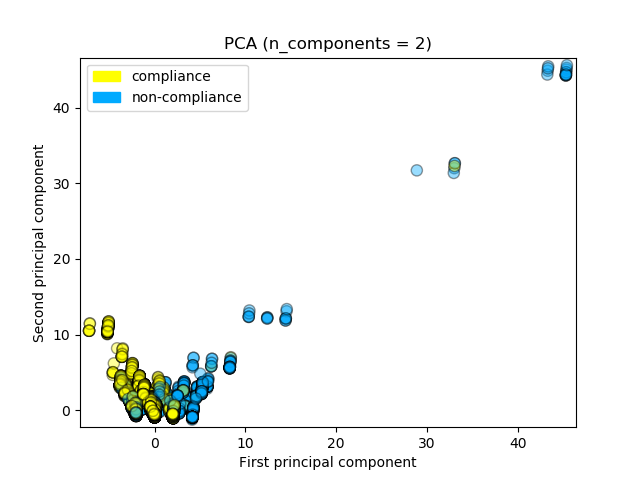

In [6]:
%matplotlib notebook
import seaborn as sn
import matplotlib.pyplot as plt

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_train, ['compliance', 'non-compliance'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA (n_components = 2)');

<IPython.core.display.Javascript object>


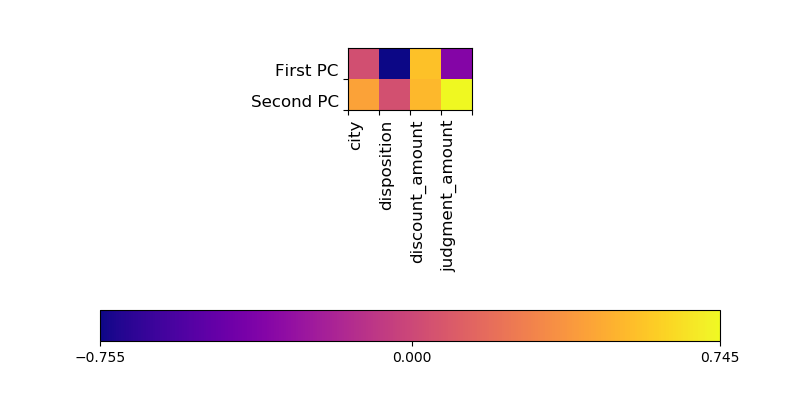

In [7]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = ['city', 'disposition', 'discount_amount', 'judgment_amount']

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

In [8]:
pc1, pc2 = pca.components_
pc1

array([ 0.03756408, -0.75500951,  0.55038534, -0.35443697])

In [9]:
print('pc1 least principal conponent: ', feature_names[np.argmin(pc1)])
print('pc1 most principal conponent: ', feature_names[np.argmax(pc1)])
print('')
print('pc2 least principal conponent: ', feature_names[np.argmin(pc2)])
print('pc2 most principal conponent: ', feature_names[np.argmax(pc2)])

pc1 least principal conponent:  disposition
pc1 most principal conponent:  discount_amount

pc2 least principal conponent:  disposition
pc2 most principal conponent:  judgment_amount
